# Machine Learning for Text
# Content

1. Project Description
2. Initialization
3. Loading Data
4. Exploratory Data Analysis (EDA)
5. Evaluation Procedure
6. Normalization
7. Train/Test Split
8. Working with Models
  - 7.1 Model 1 - Constant
  - 7.2 Model 2 - NLTK, TF-IDF, and Logistic Regression (LR)
  - 7.3 Model 3 - spaCy, TF-IDF, and Logistic Regression (LR)
  - 7.4 Model 4 - spaCy, TF-IDF, and LGBMClassifier
9. My Review
  - 8.1 Model 2
  - 8.2 Model 3
  - 8.3 Model 4
10. Conclusion

# Project Description


Film Junky Union, a new community for classic film enthusiasts, is developing a system to filter and categorize film reviews. Its main mission is to train a model that can automatically detect negative reviews. Use the IMDb movie review dataset with polarity labeling to create a model that can classify positive and negative reviews. This model should achieve an F1 score of at least 0.85.

## Initialization

In [1]:
#import libraries
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tqdm.auto import tqdm

## Data loading

In [2]:
#Load the dataset
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'}).sample(5000)

In [3]:
#chek dataset head
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
26193,tt0036260,movie,Phantom Lady,Phantom Lady,1944,\N,87,0,"Crime,Drama,Film-Noir",7.2,4098,Scott Henderson (Alan Curtis) meets a mystery ...,7,pos,1,train,3527
2170,tt0363307,tvSeries,America's Next Top Model,America's Next Top Model,2003,\N,42,0,"Game-Show,Reality-TV",5.5,17002,"America's next top model is a good show, it he...",8,pos,1,test,2931
43814,tt0120338,movie,Titanic,Titanic,1997,\N,194,0,"Drama,Romance",7.8,1016587,For me personally this film goes down in my to...,10,pos,1,train,10040
21726,tt0087685,movie,Martin's Day,Martin's Day,1985,\N,98,0,Drama,6.0,282,I first saw Martin's Day when I was just 10 ye...,10,pos,1,train,4908
17307,tt0462346,movie,How to Eat Fried Worms,How to Eat Fried Worms,2006,\N,80,0,"Comedy,Family",5.3,5032,This is an amazing movie and all of the actors...,10,pos,1,train,9055


In [4]:
#chek the 'pos' column
df_reviews['pos'].value_counts()

0    2531
1    2469
Name: pos, dtype: int64

In [5]:
#Check the 'ds_part' column
df_reviews['ds_part'].value_counts()

train    2548
test     2452
Name: ds_part, dtype: int64

In [6]:
#chek dataset size
df_reviews.shape

(5000, 17)

In [7]:
#chek the dataset info
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 26193 to 30000
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   title_type       5000 non-null   object 
 2   primary_title    5000 non-null   object 
 3   original_title   5000 non-null   object 
 4   start_year       5000 non-null   int64  
 5   end_year         5000 non-null   object 
 6   runtime_minutes  5000 non-null   object 
 7   is_adult         5000 non-null   int64  
 8   genres           5000 non-null   object 
 9   average_rating   4999 non-null   float64
 10  votes            4999 non-null   Int64  
 11  review           5000 non-null   object 
 12  rating           5000 non-null   int64  
 13  sp               5000 non-null   object 
 14  pos              5000 non-null   int64  
 15  ds_part          5000 non-null   object 
 16  idx              5000 non-null   int64  
dtypes: Int64(

In [8]:
#chek missing value
df_reviews.isnull().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     1
votes              1
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

## EDA

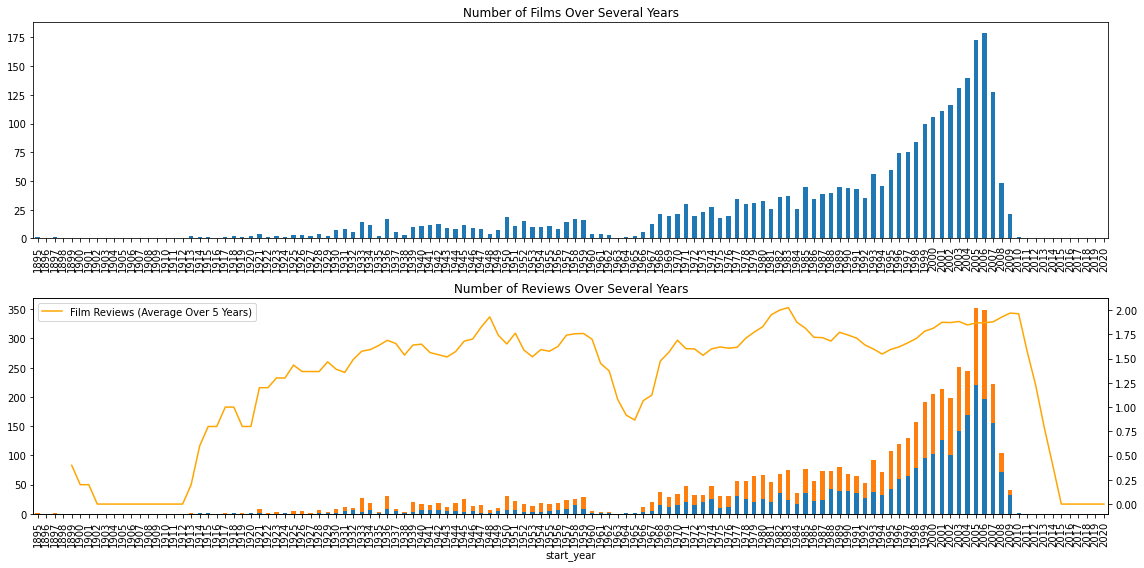

In [9]:
#Check the number of films and reviews over the years.
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Films Over Several Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#ulasan  (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='Film Reviews (Average Over 5 Years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Several Years') 

fig.tight_layout()


Note:

- The number of films produced from the 1930s to the 1950s is around below 25 films.
- The number of films from 1986 to 2007 is increasing and then decreases drastically until 2009.
- However, the number of reviews per year for films from the 1930s to 2009 seems to be fairly consistent in the range of 250-325 reviews.

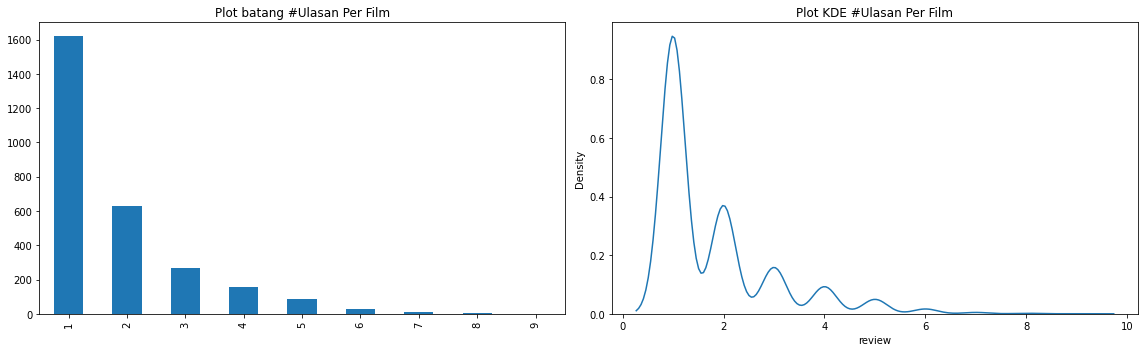

In [10]:
#Check the distribution of the number of reviews per film using accurate counting and KDE (only to observe the difference from accurate counting).
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Plot batang #Ulasan Per Film')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Plot KDE #Ulasan Per Film') 

fig.tight_layout()

Note:

- From the bar plot of the number of reviews per film, it can be observed that the most common number of reviews per film is 1, and it gradually decreases until around 8 reviews per film.
- The density distribution can be visualized using the Kernel Density Estimation (KDE) plot in continuous data form.

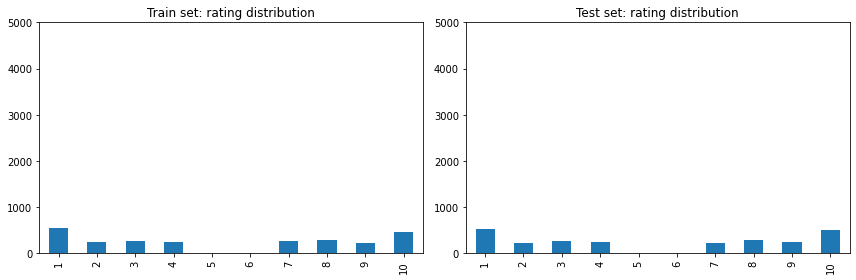

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Train set: rating distribution')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Test set: rating distribution')

fig.tight_layout()


Note:

- The rating distribution in the train set and test set appears to be balanced.


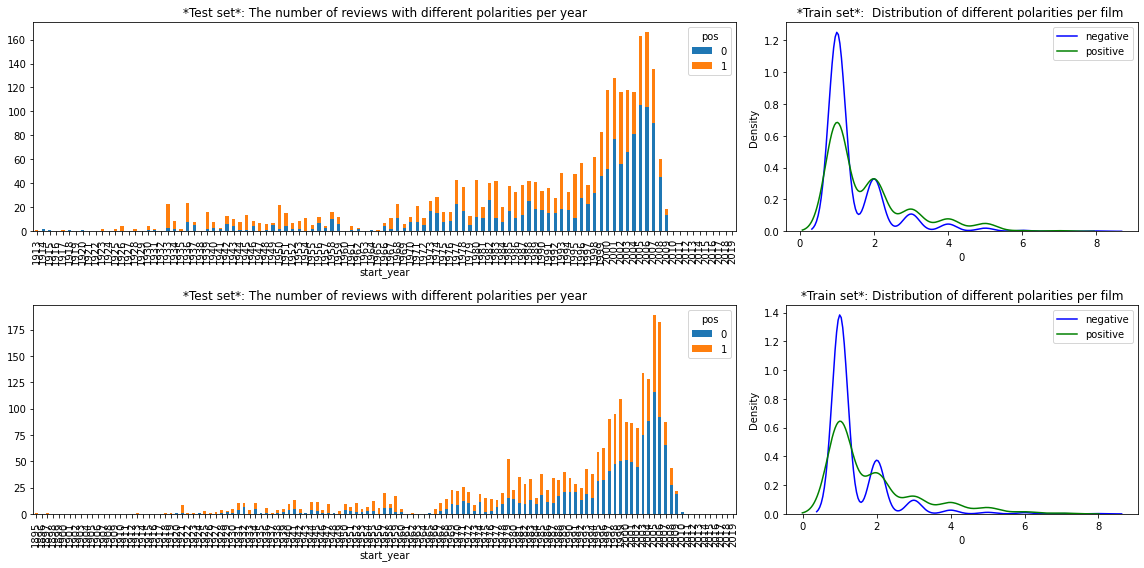

In [12]:
# The distribution of negative and positive reviews over the years for two parts of the dataset.
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('*Test set*: The number of reviews with different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('*Train set*:  Distribution of different polarities per film ')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('*Test set*: The number of reviews with different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('*Train set*: Distribution of different polarities per film')

fig.tight_layout()


note:

- In the train data and test data, there is a decreasing trend in the distribution of positive reviews in the 2000s compared to the early 1930s.
- Meanwhile, for per film analysis, it shows that negative sentiment is more common when the number of reviews is low, and negative sentiment is less common when the number of reviews is more than 2.

## Evaluation Procedure

In [13]:
# Creating evaluations that can be used for all models in this task routinely.
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Scor F1 
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # menetapkan persilangan untuk beberapa ambang batas
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Skor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # Setting thresholds for multiple crossovers.
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Kurva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # Setting thresholds for multiple crossovers.
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuration'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuration', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization


We assume that all the models below accept lowercase text without numbers, punctuation, etc.

In [14]:
#Change to lowercase text without numbers, punctuation, etc.
df_reviews['review_norm'] = df_reviews['review'].str.lower().str.replace('[^a-zA-Z]', ' ')

In [15]:
#Check the 'review' column.
df_reviews['review']

26193    Scott Henderson (Alan Curtis) meets a mystery ...
2170     America's next top model is a good show, it he...
43814    For me personally this film goes down in my to...
21726    I first saw Martin's Day when I was just 10 ye...
17307    This is an amazing movie and all of the actors...
                               ...                        
19186    Julie Waters is always marvelous but Adrian Pa...
40321    The Ogre doesn't seem to have won itself a ver...
13121    First of all, f117 is not high tech any more a...
22339    I've only seen most of the series since I leav...
30000    Secret Sunshine marks the return of director L...
Name: review, Length: 5000, dtype: object

In [16]:
#Check the 'review_norm' column.
df_reviews['review_norm']

26193    scott henderson  alan curtis  meets a mystery ...
2170     america s next top model is a good show  it he...
43814    for me personally this film goes down in my to...
21726    i first saw martin s day when i was just    ye...
17307    this is an amazing movie and all of the actors...
                               ...                        
19186    julie waters is always marvelous but adrian pa...
40321    the ogre doesn t seem to have won itself a ver...
13121    first of all  f    is not high tech any more a...
22339    i ve only seen most of the series since i leav...
30000    secret sunshine marks the return of director l...
Name: review_norm, Length: 5000, dtype: object

##  Train and Test Split

In [17]:
#Define datasets for training and testing.
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(2548, 18)
(2452, 18)


## Working with Models

### Model 1 - Constant.

In [18]:
from sklearn.dummy import DummyClassifier

            train  test
Accuration   0.49  0.50
F1           0.66  0.66
APS          0.49  0.50
ROC AUC      0.50  0.50


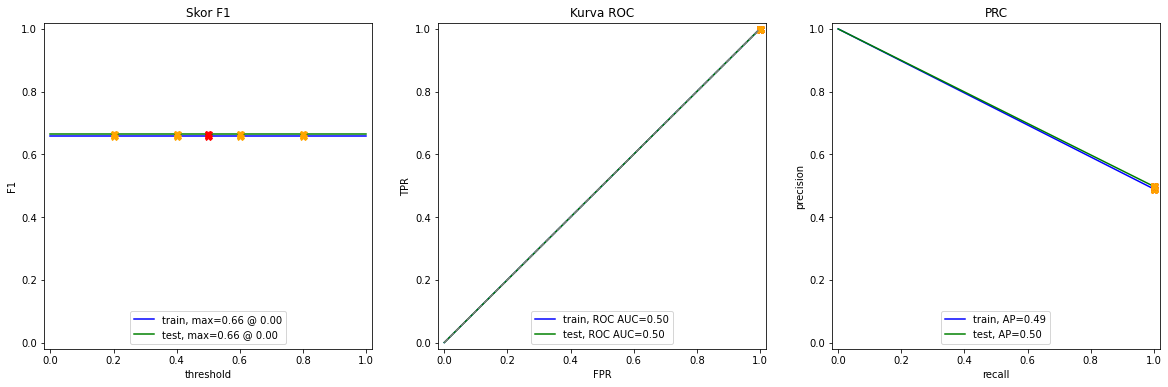

In [19]:
#DummyClassifier for Constant Model.
dummy_clf = DummyClassifier(strategy='constant', constant=1)
model_1 = dummy_clf.fit(X=df_reviews_train, y=train_target)
evaluate_model (model_1,np.empty(len(train_target)),train_target,np.empty(len(test_target)), test_target)


Note :

- F1 score remains constant for both the training and testing data at 0.68 and 0.67 respectively.
- The ROC curves for both train and test are at 0.5.
- The APS values are 0.52 for training and 0.5 for testing.

### Model 2 - NLTK, TF-IDF dan LR

TF-IDF

In [20]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression



[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
#define train features dan test features
tfidf_vectorizer_1 = TfidfVectorizer(stop_words = stopwords.words('english'), lowercase=True)

train_features_1 = tfidf_vectorizer_1.fit_transform(df_reviews_train['review_norm'])
print (train_features_1.shape)

test_features_1 = tfidf_vectorizer_1.transform (df_reviews_test['review_norm'])
print (test_features_1.shape)

(2548, 27720)
(2452, 27720)


In [22]:
#fitting model
modelLR = LogisticRegression(penalty='l1', solver = 'liblinear', C=0.5)
modelLR.fit(train_features_1,train_target)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

            train  test
Accuration   0.76  0.76
F1           0.77  0.77
APS          0.83  0.83
ROC AUC      0.85  0.85


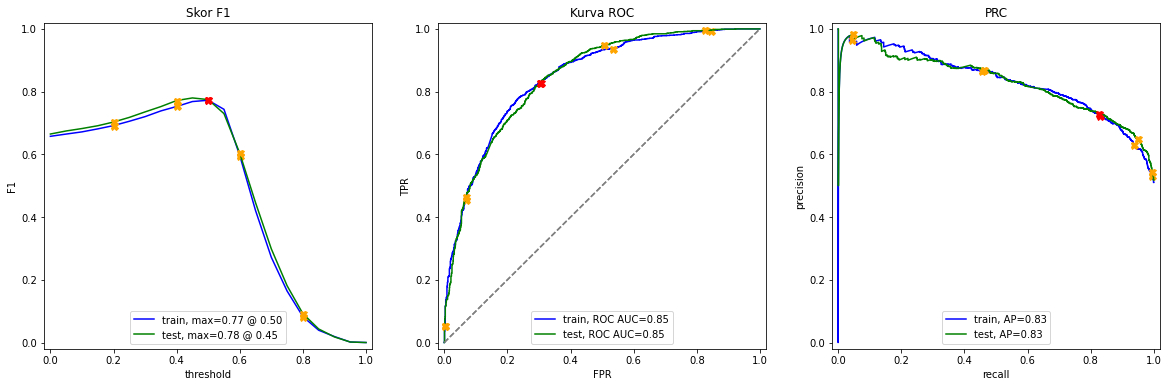

In [23]:
#model evaluation
evaluate_model(modelLR, train_features_1, train_target, test_features_1, test_target)

Note :

- In the Linear Regression model with NLTK and TF-IDF:
  - F1 score reaches its maximum value at 0.79 for training and 0.77 for testing.
  - ROC-AUC score reaches its maximum value at 0.85 for training and 0.84 for testing.
  - Recall score reaches its maximum value at 0.85 for training and 0.84 for testing.

### Model 3 - spaCy, TF-IDF dan LR

In [24]:
#Initializing spaCy

import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [25]:
#define text preprocessing
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [26]:
#text preprocessing data train
df_reviews_train['review_tokenized_3'] = df_reviews_train['review_norm'].apply(lambda x: text_preprocessing_3(x))

In [27]:
#text preprocessing data test
df_reviews_test['review_tokenized_3'] = df_reviews_test['review_norm'].apply(lambda x: text_preprocessing_3(x))

In [28]:
#chek sample data train
df_reviews_train['review_tokenized_3'].sample (3)

5588     what a disgrace   I be check this out hope it ...
43074    I have just reach thirteen when I first see th...
25490    robert culp   they call his character   doctor...
Name: review_tokenized_3, dtype: object

In [29]:
#chek sample data test
df_reviews_test['review_tokenized_3'].sample(3)

23948    I can t say that I embrace this as a romantic ...
5396     this movie have it all   great actor   good di...
12700    I m think of some thing for this movie   first...
Name: review_tokenized_3, dtype: object

In [30]:
##define train features dan test features
tfidf_vectorizer_3 = TfidfVectorizer()

train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_tokenized_3'])
print (train_features_3.shape)

test_features_3 = tfidf_vectorizer_3.transform (df_reviews_test['review_tokenized_3'])
print (test_features_3.shape)

(2548, 22448)
(2452, 22448)


In [31]:
#fitting model
modelLR3 = LogisticRegression(penalty='l1', solver = 'liblinear', C=0.5)
modelLR3.fit(train_features_3,train_target)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

            train  test
Accuration   0.77  0.76
F1           0.78  0.78
APS          0.84  0.84
ROC AUC      0.85  0.85


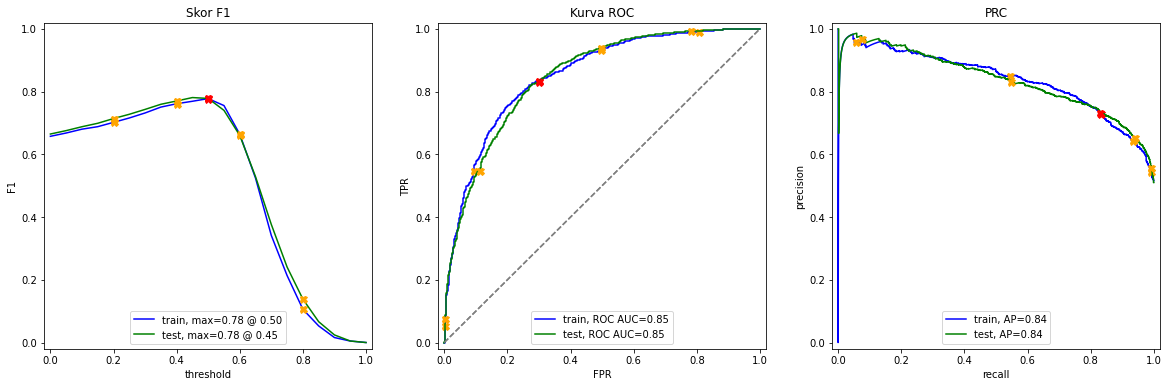

In [32]:
# model evaluation
evaluate_model(modelLR3, train_features_3, train_target, test_features_3, test_target)


Note:

- In the LinearRegression model with spaCy and TF-IDF:
  - The F1 score reaches its maximum value during training at 0.8 and during testing at 0.77.
  - The ROC-AUC score reaches its maximum value during training at 0.85 and during testing at 0.84.
  - The recall score reaches its maximum value during training at 0.85 and during testing at 0.83.

### Model 4 - spaCy, TF-IDF dan LGBMClassifier

In [33]:
#import library
from lightgbm import LGBMClassifier

In [34]:
#fitting model
modelLGBM = LGBMClassifier(learning_rate = 0.04, max_depth=4)
modelLGBM.fit(train_features_3, train_target)

LGBMClassifier(learning_rate=0.04, max_depth=4)

            train  test
Accuration   0.86  0.78
F1           0.87  0.80
APS          0.95  0.86
ROC AUC      0.95  0.87


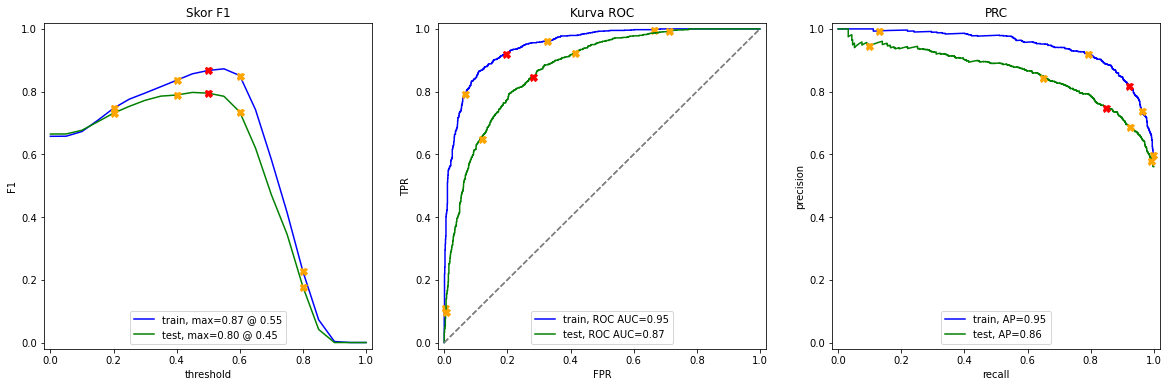

In [35]:
#evaluate
evaluate_model(modelLGBM, train_features_3, train_target, test_features_3, test_target)


Note:

- In the LGBMClassifier model with spaCy and TF-IDF:
  - The F1 score reaches its maximum value during training at 0.86 and during testing at 0.79.
  - The ROC-AUC score reaches its maximum value during training at 0.87 and during testing at 0.81.
  - The recall score reaches its maximum value during training at 0.86 and during testing at 0.79.

In [36]:
# Model 5 - BERT 
#import torch
#import transformers

In [37]:
#tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
#3config = transformers.BertConfig.from_pretrained('bert-base-uncased')
#model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [38]:
#def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
 #   ids_list = []
 #   attention_mask_list = []

    # teks ke id token yang sudah di-padded bersamaan dengan attention mask
    
    # <masukkan kode di sini untuk ids_list dan attention_mask_list>
    
 #   if force_device is not None:
 #       device = torch.device(force_device)
 #   else:
 #       device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
 #   model.to(device)
 #   if not disable_progress_bar:
 #       print(f'Gunakan {perangkat} perangkat.')
    
    # dapatkan embedding dalam batch 

 #   embeddings = []

 #   for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
 #       ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <masukkan kode di sini untuk membuat attention_mask_batch 
            
 #       with torch.no_grad():            
 #           model.eval()
 #           batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
 #       embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
 #   return np.concatenate(embeddings)

In [39]:
# Perhatian! Menjalankan BERT untuk ribuan teks mungkin memakan waktu lama di CPU, setidaknya beberapa jam
#train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [40]:
#print(df_reviews_train['review_norm'].shape)
#print(train_features_9.shape)
#print(train_target.shape)

In [41]:
# jika sudah mendapatkan embedding, disarankan untuk menyimpannya agar siap 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# dan muat...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## My Review

In [42]:
#creating review column

my_reviews = pd.DataFrame([
    'I dont like it very much, not my favorite kind of movie', 
    'Its boring, even I slept in the middle of the movie', 
    'The movie is so good, I really like it',     
    'Even the actors look very old and have no interest in the movie, whether they are paid to play the movie. Its really not qualified.', 
    'I didnt expect the movie to be so good! The writers really paid attention to every detail', 
    'This movie has its advantages and disadvantages, but I feel overall it is a decent film. Ill probably watch it again.', 
    'Some of his jokes are really not funny. Not a single joke works, everyone is acting annoying, even children wont like this!', 
    'Showing this movie on Netflix is a bold move & Im so excited to be watching episode after episode of this exciting and smart new drama.' 
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(lambda x : text_preprocessing_3(x))
my_reviews

,review,review_norm
0,"I dont like it very much, not my favorite kind...","I do not like it very much , not my favorite k..."
1,"Its boring, even I slept in the middle of the ...","its boring , even I sleep in the middle of the..."
2,"The movie is so good, I really like it","the movie be so good , I really like it"
3,Even the actors look very old and have no inte...,even the actor look very old and have no inter...
4,I didnt expect the movie to be so good! The wr...,I do not expect the movie to be so good ! the ...
5,This movie has its advantages and disadvantage...,this movie have its advantage and disadvantage...
6,Some of his jokes are really not funny. Not a ...,some of his joke be really not funny . not a s...
7,Showing this movie on Netflix is a bold move &...,show this movie on Netflix be a bold move & I ...


### Model 2

In [43]:
#review prediction using model NLTK, TF-IDF dan LR
texts = my_reviews['review_norm']

my_reviews_pred_prob = modelLR.predict_proba(tfidf_vectorizer_1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.51:  I do not like it very much , not my favorite kind of movie
0.02:  its boring , even I sleep in the middle of the movie
0.47:  the movie be so good , I really like it
0.38:  even the actor look very old and have no interest in the movie , whether they be pay to play the mov
0.56:  I do not expect the movie to be so good ! the writer really pay attention to every detail
0.56:  this movie have its advantage and disadvantage , but I feel overall it be a decent film . Ill probab
0.24:  some of his joke be really not funny . not a single joke work , everyone be act annoying , even chil
0.56:  show this movie on Netflix be a bold move & I m so excited to be watch episode after episode of this


### Model 3

In [44]:
#recview prediction using spaCy, TF-IDF dan LR model
texts = my_reviews['review_norm']

my_reviews_pred_prob = modelLR3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.60:  I do not like it very much , not my favorite kind of movie
0.06:  its boring , even I sleep in the middle of the movie
0.62:  the movie be so good , I really like it
0.19:  even the actor look very old and have no interest in the movie , whether they be pay to play the mov
0.50:  I do not expect the movie to be so good ! the writer really pay attention to every detail
0.59:  this movie have its advantage and disadvantage , but I feel overall it be a decent film . Ill probab
0.32:  some of his joke be really not funny . not a single joke work , everyone be act annoying , even chil
0.55:  show this movie on Netflix be a bold move & I m so excited to be watch episode after episode of this


### Model 4

In [45]:
#review prediction usingspaCy, TF-IDF dan LGBMClassifier model
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = modelLGBM.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.72:  I do not like it very much , not my favorite kind of movie
0.29:  its boring , even I sleep in the middle of the movie
0.64:  the movie be so good , I really like it
0.51:  even the actor look very old and have no interest in the movie , whether they be pay to play the mov
0.64:  I do not expect the movie to be so good ! the writer really pay attention to every detail
0.64:  this movie have its advantage and disadvantage , but I feel overall it be a decent film . Ill probab
0.45:  some of his joke be really not funny . not a single joke work , everyone be act annoying , even chil
0.64:  show this movie on Netflix be a bold move & I m so excited to be watch episode after episode of this


## Conclussion


- In the LinearRegression model with NLTK and TF-IDF:
  - The F1 score reaches its maximum value of 0.79 during training and 0.77 during testing.
  - The ROC-AUC score achieves its highest value of 0.85 during training and 0.84 during testing.
  - The recall score also achieves its maximum value of 0.85 during training and 0.84 during testing.
- In the LinearRegression model with spaCy and TF-IDF:
  - The F1 score peaks at 0.80 during training and 0.77 during testing.
  - The ROC-AUC score reaches its maximum value of 0.85 during training and 0.84 during testing.
  - The recall score attains its highest value of 0.85 during training and 0.83 during testing.
- In the LGBMClassifier model with spaCy and TF-IDF:
  - The F1 score reaches its maximum value of 0.86 during training and 0.79 during testing.
  - The ROC-AUC score achieves its highest value of 0.87 during training and 0.81 during testing.
  - The recall score also reaches its maximum value of 0.86 during training and 0.79 during testing.
- Model 4 (spaCy, TF-IDF, and LGBMClassifier) provides higher prediction scores on reviews compared to models 2 and 3.